In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
n = 3
A = np.random.randn(n,n)
Q, R = np.linalg.qr(A)
QT = Q.T
QI = np.linalg.inv(Q)
print(np.round(QT@Q, 8), "\n")
print(np.round(Q@QT, 8), "\n")
print(np.round(Q@QI, 8), "\n")
print(np.round(QI@Q, 8), "\n")

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]] 

[[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]] 



# Exercise 2

Gram-scmidt:
- Iterate through columns of the matrix left to right
- For each column, subtract the parallel parts of the orthogonal vector decomposition from all previous columns
- After the subtractions, regularize the norm of the column to be 1
- Notice that numpy's QR decomposition uses a different (Householder) algorithm, which results in signs being reversed

In [3]:
m = 4
n = 4
A = np.random.randn(m,n)
Q = np.zeros((m,n))

for i in range(n):
    Q[:,i] = A[:,i]
    
    a = A[:,i]
    for j in range(i):
        q = Q[:,j]
        Q[:,i] -= np.dot(a,q) / np.dot(q,q) * q
    Q[:,i] /= np.linalg.norm(Q[:,i])
    
QQ = np.linalg.qr(A)[0]
print(np.round(Q - QQ, 10))
print(np.round(Q + QQ, 10))

[[ 0.32126353 -0.          0.          1.26020965]
 [ 1.77863948 -0.          0.         -0.53499704]
 [ 0.85614308  0.          0.          0.66257211]
 [ 0.01582268 -0.          0.         -1.29871013]]
[[-0.          0.65532833  1.37084141  0.        ]
 [ 0.         -0.63726084  0.37962926  0.        ]
 [ 0.          1.05148413 -1.31240175  0.        ]
 [ 0.          1.43486045  0.50425897  0.        ]]


# Exercise 3

In [4]:
A = np.random.randn(6,6)
U = np.linalg.qr(A)[0]
Q, R = np.linalg.qr(U)
print(np.round(R, 8), "\n")

for i in range(Q.shape[1]):
    Q[:,i] *= (i + 10)
Q, R = np.linalg.qr(Q)
print(np.round(R, 8), "\n")

U[0,3] = 0
Q, R = np.linalg.qr(U)
print(np.round(R, 10))

[[ 1. -0. -0. -0.  0. -0.]
 [ 0.  1.  0. -0. -0.  0.]
 [ 0.  0.  1.  0. -0.  0.]
 [ 0.  0.  0.  1. -0.  0.]
 [ 0.  0.  0.  0.  1. -0.]
 [ 0.  0.  0.  0.  0.  1.]] 

[[10. -0. -0. -0.  0. -0.]
 [ 0. 11.  0. -0. -0. -0.]
 [ 0.  0. 12.  0.  0.  0.]
 [ 0.  0.  0. 13. -0. -0.]
 [ 0.  0.  0.  0. 14. -0.]
 [ 0.  0.  0.  0.  0. 15.]] 

[[ 1.         -0.         -0.          0.04274261  0.         -0.        ]
 [ 0.          1.          0.         -0.04982588 -0.          0.        ]
 [ 0.          0.          1.         -0.16139666 -0.          0.        ]
 [ 0.          0.          0.          0.90384738  0.1842767  -0.29539296]
 [ 0.          0.          0.          0.          0.98287441  0.0553825 ]
 [ 0.          0.          0.          0.          0.          0.95376925]]


Observations
- When performing QR on an orthogonal matrix, it simply yields R = I
- When performing QR on a matrix with orthogonal columns and different norms, R becomes and identity matrix scaled by the norms of the columns
- When the orthogonality of the matrix is broken at an element, R is still the identity matrix until the column corresponding to where the orthogonality is broken, at which point it becomes different because of the orthogonalization procedure

# Exercise 4

In [5]:
def old_inv(A):
    m = A.shape[0]
    if m != A.shape[1]:
        raise Exception("Matrix must be square")
    if np.linalg.matrix_rank(A) < m:
        raise Exception("Matrix must be full rank")
        
    M = np.zeros((m,m))
    G = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            rows, cols = [True]*m, [True]*m
            rows[i], cols[j] = False, False
            M[i,j] = np.linalg.det(A[rows,:][:,cols])
            G[i,j] = (-1)**(i+j)
    return (M * G).T / np.linalg.det(A)

In [6]:
n = 5
A = np.random.randn(n,n)
AAi_old = A @ old_inv(A)
Q, R = np.linalg.qr(A)
AAi_qr = A @ old_inv(R) @ Q.T

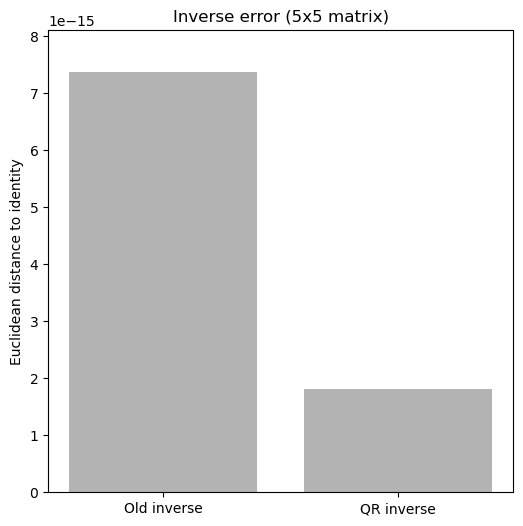

In [7]:
true_I = np.eye(n)
sse = [0, 0]
sse[0] = np.sqrt(np.sum((AAi_old-true_I)**2))
sse[1] = np.sqrt(np.sum((AAi_qr-true_I)**2))

plt.figure(figsize = (6,6))
plt.bar(range(2), sse, color = 3*[0.7])
plt.xticks(range(2), labels = ["Old inverse", "QR inverse"])
plt.ylim([0, np.max(sse)*1.1])
plt.ylabel("Euclidean distance to identity")
plt.title(f"Inverse error ({n}x{n} matrix)")
plt.savefig('Figure_09_03.png',dpi=300)
plt.show()

- Note that the old inverse may have less error than the QR simply through randomness

# Exercise 5

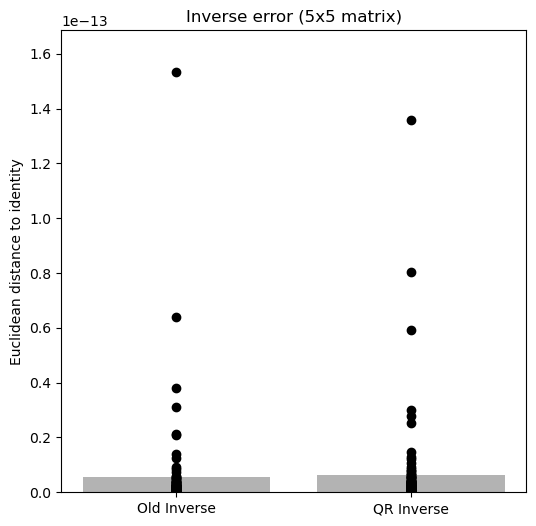

In [8]:
n = 5
reps = 100
sse = np.zeros((reps,2))
true_I = np.eye(n)

for i in range(reps):
    A = np.random.randn(n,n)
    AAi_old = A @ old_inv(A)
    Q, R = np.linalg.qr(A)
    AAi_qr = A @ old_inv(R) @ Q.T
    sse[i,0] = np.sqrt(np.sum((AAi_old-true_I)**2))
    sse[i,1] = np.sqrt(np.sum((AAi_qr-true_I)**2))
    
plt.figure(figsize = (6,6))
plt.plot(np.zeros(reps), sse[:,0], "ko")
plt.plot(np.ones(reps), sse[:,1], "ko")
plt.bar(range(2), np.mean(sse, axis = 0), color = 3*[0.7])
plt.xticks(range(2), labels = ["Old Inverse", "QR Inverse"])
plt.ylim([0, np.max(sse)*1.1])
plt.ylabel("Euclidean distance to identity")
plt.title(f"Inverse error ({n}x{n} matrix)")
plt.savefig('Figure_09_04a.png',dpi=300)

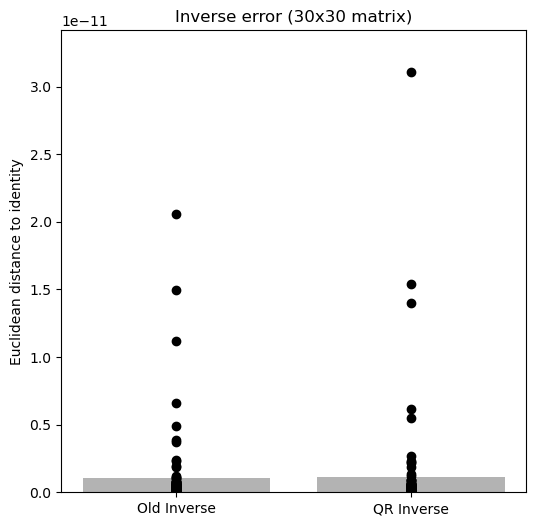

In [9]:
n = 30
reps = 100
sse = np.zeros((reps,2))
true_I = np.eye(n)

for i in range(reps):
    A = np.random.randn(n,n)
    AAi_old = A @ old_inv(A)
    Q, R = np.linalg.qr(A)
    AAi_qr = A @ old_inv(R) @ Q.T
    sse[i,0] = np.sqrt(np.sum((AAi_old-true_I)**2))
    sse[i,1] = np.sqrt(np.sum((AAi_qr-true_I)**2))
    
plt.figure(figsize = (6,6))
plt.plot(np.zeros(reps), sse[:,0], "ko")
plt.plot(np.ones(reps), sse[:,1], "ko")
plt.bar(range(2), np.mean(sse, axis = 0), color = 3*[0.7])
plt.xticks(range(2), labels = ["Old Inverse", "QR Inverse"])
plt.ylim([0, np.max(sse)*1.1])
plt.ylabel("Euclidean distance to identity")
plt.title(f"Inverse error ({n}x{n} matrix)")
plt.savefig('Figure_09_04b.png',dpi=300)

# Exercise 6

Square orthogonal matrix properties:

- All singular values and eigenvalues equal 1 $\rightarrow$ the induced norm (highest eigenvalue) equals 1
- For an MxM matrix, the Frobenius norm equals M
- Multiplying a vector by an orthogonal matrix does not affect the norm

In [10]:
n = 13
Q, R = np.linalg.qr(np.random.randn(13,13))

# First line yields the induced norm (highest eigenvalue)
print(np.linalg.norm(Q, 2))
print(np.sqrt(np.sum(Q**2)) / np.sqrt(13))

1.0000000000000004
1.0000000000000002


In [11]:
v = np.random.randn(n,1)
v_norm = np.linalg.norm(v)
Qv_norm = np.linalg.norm(Q @ v)

print(v_norm, Qv_norm)

4.204492830946967 4.204492830946967


- Notice that the norm of v equals the square root of $v^{\prime}v$
- The norm of Qv equals the square root of $(Qv)^{\prime}Qv = v^{\prime}Q^{\prime}Qv = v^{\prime}v$
- The interpretation of this is that orthogonal matrices can rotate vectors but never scale them

# Exercise 7

More QR facts

- The QR decomposition has both economy and complete forms for nonsquare matrices
- For the complete form, R isn't square, so we can't use it to compute inverses like we did before
- However, the inverse of the nonzero part of R will be equal to the psuedo/left inverse of the tall R
- Therefore, we can still use QR to perform inversions for tall matrix applications like regression

In [12]:
m = 10
n = 4
Q, R = np.linalg.qr(np.random.randn(10,4), "complete")
print(R)

[[ 3.07860574  0.41578588  0.95179904 -0.23826068]
 [ 0.          3.2180989   2.00626621  0.81481716]
 [ 0.          0.          4.3128409  -0.9490839 ]
 [ 0.          0.          0.          2.25538327]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [13]:
R_s = R[:4,:]
R_s_inv = np.linalg.inv(R_s)
R_left_inv = np.linalg.pinv(R)
print("Full inverse of the R submatrix:")
print(np.round(R_s_inv, 3), "\n", "\n")
print("Left inverse of R:")
print(np.round(R_left_inv, 3))

Full inverse of the R submatrix:
[[ 0.325 -0.042 -0.052  0.028]
 [ 0.     0.311 -0.145 -0.173]
 [ 0.     0.     0.232  0.098]
 [ 0.     0.     0.     0.443]] 
 

Left inverse of R:
[[ 0.325 -0.042 -0.052  0.028  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.311 -0.145 -0.173  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.232  0.098  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.443  0.     0.     0.     0.     0.     0.   ]]
